In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os

In [119]:
authors_wGender = pd.read_pickle("Dataframes/authors_wGender.pkl") #read df for all authors with gender

In [284]:
participants_df = authors_wGender[authors_wGender.SessionType == 'presenter']
invited_df = authors_wGender[authors_wGender.SessionType == 'invited']

In [285]:
invited_df.groupby('API_Name').count().sort_values(by = 'FileID', ascending = False)

,FileID,OriginalName,MaxPaperCount,Field,FirstPaperYear,AuthorCount,Year,Name,Institution,Title,Division,SessionType,SessionIndex,FirstName,Seniority,CumulativePaperCount,Productivity,Gender
API_Name,,,,,,,,,,,,,,,,,,
Li Wang,109,109,109,109,109,109,109,109,109,109,30,109,30,109,109,109,105,109
Terence Hwa,62,62,62,62,62,62,62,62,62,62,57,62,57,62,62,62,62,62
Ulrich Gerland,42,42,42,42,42,42,42,42,42,42,41,42,41,42,42,42,42,42
Herbert Levine,33,33,33,33,33,33,33,33,33,33,27,33,27,33,33,33,32,33
Subir Sachdev,27,27,27,27,27,27,27,27,27,27,17,27,17,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Davide Ceresoli,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
M. Spiropulu,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
M. Sorel,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1


In [286]:
invited_df[invited_df.API_Name == 'Li Wang'].OriginalName.unique()

array(['Juan Santiago', 'Sebastian Vieira', 'Alessandro Silva',
       'Eduardo H. da Silva Neto', 'Andrea Morales', 'Victor Batista',
       'Jin Wang', 'Pablo Iglesias', 'Gerardo Ortiz', 'Rafael Morales',
       'Carla Gomes', 'Rodrigo Pereira', 'Daniel Schmidt', 'Carlos Silva',
       'Ricardo Ruiz', 'Cristina Torres', 'Enrique De La Cruz',
       'Juan De Pablo', 'David Lucas', 'Muhammad Alam',
       'Jose Alfredo Caro', 'Juan de Pablo', 'Christine Ortiz',
       'Roberto Di Leonardo', 'Julia Ruth', 'David Peters', 'Luis Santos',
       'Vivian Ferry', 'Antonio Castro Neto', 'Javier Pablo-Navarro',
       'Javier del Valle', 'Fernando Luis', 'Mohammad Amin',
       'Miguel Morales', 'Marcia Simon', 'Marcus da Silva',
       'Ana Martin Fernandez', 'Maria J. Ramos', 'John Mitchell',
       'Rafael Jaramillo', 'Pedro J de Pablo', 'Alejandro Ruiz',
       'Alfredo A. Correa', 'Manuel Campos', 'Fernando De Juan',
       'Rafael Fernandes', 'Marcelo Jaime', 'Miguel A. Morales',
       

Now we find unique researcher for each year. 

In [300]:
df_participants = participants_df[participants_df.Year >= 2005]
df_invited = invited_df[invited_df.Year >= 2005]

In [301]:
#Drop duplicates in respect to name and year
invited = df_invited.drop_duplicates(subset = ['OriginalName', 'Year'])
participants = df_participants.drop_duplicates(subset = ['OriginalName', 'Year'])

In [303]:
#save invited speakers and participants
invited.to_pickle("Files/DataFrames/InvitedSpeakers_unique.pkl")
participants.to_pickle("Files/DataFrames/Participants_unique.pkl")

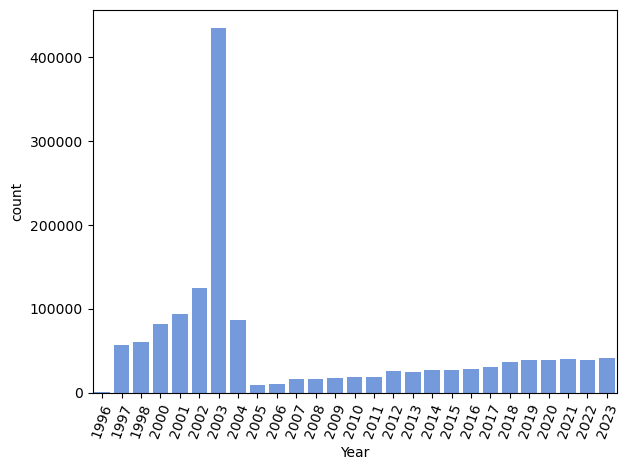

In [121]:
sns.countplot(x = 'Year', data = participants , color = 'cornflowerblue')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

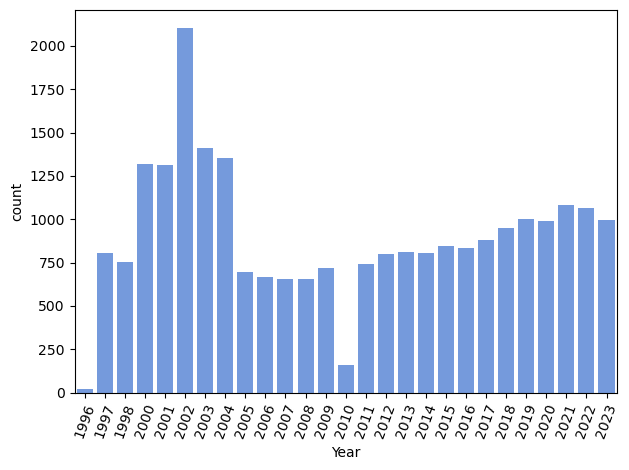

In [122]:
sns.countplot(x = 'Year', data = invited , color = 'cornflowerblue')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Let's find data for 2010, and investigate why there is very few invited speakers but fair amount of participants. 

In [123]:
def removeFile(fileList, file): #remove file from list of files. file as string 
    if file in fileList:
        fileList.remove(file)
        
    return fileList  

In [124]:
speakerPath = "Files/InvitedSpeakers"
presenterPath = "Files/Presenters"
pagesPath = "Files/Pages"
sessionPath = "Files/Sessions"

speakers = removeFile(os.listdir(speakerPath), '.DS_Store') #invited speakers for 2005-2023
presenters = removeFile(os.listdir(presenterPath),'.DS_Store')  #all presenters for 2005-2023
pages = removeFile(os.listdir(pagesPath), '.DS_Store') #pages showing overview of sessions for 1994-2004
sessions = removeFile(os.listdir(sessionPath), '.DS_Store') #showing overview of subsessions for 1994-2004

In [125]:
year = '10'
speakerSoup = BeautifulSoup(open(speakerPath + '/' + 'Speakers' + year + '_0.txt'))

In [126]:
#loop through files starting with Presenter10_
#presenters
count = 0
for file in presenters:
    if file.startswith("Presenter" + year):
        presenterSoup = BeautifulSoup(open(presenterPath + '/' + file))
        count += 1
print(count)

7566


In [127]:
speakers = []
speakerInfo = speakerSoup.table.findAll('tr')
for i in speakerInfo:
    inv_name = i.strong.text #invited speakers
    speakers.append(inv_name)

Let's investigate invited speakers for 2002 and 1996

In [131]:
speaker96 = BeautifulSoup(open(pagesPath + '/' + "Pages96_0.txt"))
speaker02 = BeautifulSoup(open(pagesPath + '/' + "Pages02_0.txt"))
speaker03 = BeautifulSoup(open(pagesPath + '/' + "Pages03_0.txt"))

In [140]:
researchers = pd.read_csv("Files/03_allResearchers.csv", on_bad_lines='skip', header = None)

In [174]:
len(researchers[researchers[0].notnull()]) + len(researchers[researchers[1].notnull()]) + len(researchers[researchers[2].notnull()]) + len(researchers[researchers[3].notnull()]) + len(researchers[researchers[4].notnull()]) + len(researchers[researchers[5].notnull()])

705

In [173]:
participants03[participants03.OriginalName == 'A Trifonova']

,FileID,OriginalName,API_Name,MaxPaperCount,Field,FirstPaperYear,AuthorCount,Year,Name,Institution,Title,Division,SessionType,SessionIndex,FirstName,Seniority,CumulativePaperCount,Productivity,Gender
368946,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Chemical Physics,APS,presenter,703909.0,Evgeniya,-9.0,0,-0.0,F
368947,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",On Planck,APS,presenter,704213.0,Evgeniya,-9.0,0,-0.0,F
368948,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Ensemble Dynamics with Quantum Forces,APS,presenter,704517.0,Evgeniya,-9.0,0,-0.0,F
368949,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Wavepacket Dynamics on Dynamically Adapting Gr...,APS,presenter,704821.0,Evgeniya,-9.0,0,-0.0,F
368950,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...","Minimum Energy Structures of Ni, Au and NiAl C...",APS,presenter,705125.0,Evgeniya,-9.0,0,-0.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369253,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",High Field Phase Diagram of PrOs_4Sb_12,APS,presenter,797237.0,Evgeniya,-9.0,0,-0.0,F
369254,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Shape Descriptors for Scanning Probe Recogniti...,APS,presenter,797541.0,Evgeniya,-9.0,0,-0.0,F
369255,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Atomic-Scale Surface Modification and In-Situ ...,APS,presenter,797845.0,Evgeniya,-9.0,0,-0.0,F
369256,201735,A Trifonova,Evgeniya A. Trifonova,825,Physics,2012.0,53,2003,A Trifonova,"National Institute for Materials Science, 1-2-...",Cubic GaN Formation in Mn/GaN Multilayer Films...,APS,presenter,798149.0,Evgeniya,-9.0,0,-0.0,F


In [204]:
import re

In [205]:
def checkString(string, regex):
    if re.findall(regex, string):
        return True
    else:
        return False

In [206]:
def checkNames(nameList): #check if string is a name
    names = []
    for n in nameList:
        name = n.get_text()
        if name != '' and name != 'both' and name != 'smaller':
            if not checkString(name, r'session') and not checkString(name, r'Room') and not checkString(name, r'\[.*\]') and not checkString(name, r'\n\n'):
                names.append(n)
    return names

In [212]:
def getUni_and_Name(string):
    nameInfo = []
    names = re.split(r',\s*(?![^()]*\))', string)
    
    noUniversity = [] 
    universityList = []
    
    for i in names: #loop through all names
        if checkUniversity(i): #if name is together with a university
            university, name = getNameInfo(i) #get name and university
            nameInfo.append((name, university)) #add name and university to set
            
            universityList.extend(repeat(university, len(noUniversity))) #append university the number of times, a name don't have a university
            noUniInfo = list(zip(noUniversity, universityList)) #assign name without university to university
            nameInfo += noUniInfo #add name and university to list
            
            noUniversity = [] #reset names without university
            
        else:
            noUniversity.append(i)
            
    return nameInfo

In [216]:
def getNameInfo(string): #return university and name from string (if university is inside pharanthesis)
    university = re.findall(r'\((.*)\)', string)[0]
    name = re.findall(r'(.*)\(', string)[0]
    name = re.sub(' ', '', name)

    return university, name

In [217]:
def checkUniversity(string): #check if string includes university (if it is inside pharanthesis)
    if re.findall('\(.*\)', string):
        return True
    else:
        return False

In [220]:
from itertools import repeat

In [248]:
for file in sessions:
    if file.startswith("Session02"):
        soup = BeautifulSoup(open(sessionPath + '/' + file))
        sessionInfo = soup.findAll('i') #info about session
        #if sessionInfo[0].startswith("<i>INVITED session"
        if str(sessionInfo[0]).startswith('<i>INVITED session'):
            sessionName = checkNames(sessionInfo[2:])
            for n in sessionName: #loop through names, one session at a time
                names = getUni_and_Name(n.text)
                print(names)
                
                
        #select only those with invited session.Use regular expression

[('JosephNiemela', 'University of Oregon')]
[('DetlefLohse', 'Department of Applied Physics, University of Twente, The Netherlands')]
[('ZahirDaya', 'Los Alamos National Laboratory')]
[('MasakiSano', 'Department of Physics, University of Tokyo')]
[('RobertoVerzicco', 'DIMeG and CEMeC, Politecnico di Bari, Via Re David 200, 70125, Bari, Italia.')]
[('SangRyulPark', 'Physics Department, Brown University, Providence, RI 02912')]
[('EliZeldov', 'Department of Condensed Matter Physics, Weizmann Institute of Science, Rehovot 76100, Israel')]
[('StephenTeitel', 'University of Rochester')]
[('EvaY.Andrei', 'Department of Physics and Astronomy, Rutgers University')]
[('S.Bhattacharya', 'NEC Research Institute, Princeton, New Jersey 08540, and Tata Institute of Fundamental Research, Mumbai 400005, India')]
[('PaulBraun', 'University of Illinois at Urbana-Champaign')]
[('DavidPine', 'Department of Chemical Engineering amp; Department of Materials, University of California, Santa Barbara, CA 93106

[('RomanCzujko', 'American Institute of Physics, Statistical Research Center, College Park, MD 20906')]
[('ErickMayIII', 'Wachovia Securities')]
[('TimothyT.Childs', 'TLC Precision Wafer Technology')]
[('FernandoA.Ponce', 'Arizona State University')]
[('FernandoEscobedo', 'Cornell University')]
[('ScottSides', 'University of California at Santa Barbara')]
[('MarcusMueller', 'Institut fuer Physik, WA331, Johannes Gutenberg Universitaet, D55099 Mainz, Germany')]
[('DmitryBedrov', 'Departmetn of Materials Science, University of Utah')]
[('JorgeVinals', 'Laboratory of Computational Genomics, Donald Danforth Plant Science Center')]
[('YingChen', 'Johns Hopkins University, Baltimore, MD')]
[('GerhardMuller', 'Department of Physics, University of Rhode Island')]
[('GoetzS.Uhrig', 'Institut fuer Theoretische Physik, Koeln, Germany')]
[('IgorZaliznyak', 'Brookhaven National Laboratory')]
[('MichelKenzelmann', 'NIST Center for Neutron Research and Johns Hopkins University')]
[('CetinKilic', 'Nat

[('S.E.Barrett', 'Department of Physics, Yale University')]
[('JairoSinova', 'University of Texas at Austin')]
[('AndrewG.Green', 'Oxford University')]
[('J.H.Smet', 'Max-Planck-Insitute for Solid State Physics')]
[('EtienneDePoortere', 'Department of Electrical Engineering, Princeton University')]
[('JimEisenstein', 'Caltech')]
[('H.A.Fertig', 'University of Kentucky')]
[('AnnaLopatnikova', 'Harvard University')]
[('VadimOganesyan', 'Princeton University')]
[('CarlosWexler', 'University of Missouri-Columbia')]
[('Young-JuneKim', 'Brookhaven National Laboratory')]
[('Fu-ChunZhang', 'University of Cincinnati')]
[('MichaelRubhausen', 'Universitat Hamburg, Jungiusstraße 9, D-20355 Hamburg, Germany. University of Illinois at Urbana-Champaign, 1110 West-Green Street, IL-61801, USA')]
[('JoergFink', 'IFW Dresden, Postfach 270016, D-01171 Dresden, Germany')]
[('ZahidHasan', 'Stanford University')]
[('MichaelSchreckenberg', 'Physics of Transport and Traffic, University of Duisburg, Germany')]


[('IvarGiaever', 'Rensselaer Polytechnic Institute, Troy, NY 12180')]
[('JoseOnuchic', 'Department of Physics, University of California at San Diego, La Jolla, CA 92093-0319')]
[('EugenMerzbacher', 'University of North Carolina at Chapel Hill')]
[('NancyMakri', 'UIUC')]
[('BrendanPlapp(AmericanPhysicalSocietyCongressionalScienceFellow', 'American Physical Society Congressional Science Fellow (2000-2001)')]
[('JeffreyRogers', 'HRL Laboratories, LLC')]
[('ThomasD.Rossing', 'Physics Department, Northern Illinois University, DeKalb, IL 60115')]
[('JamalRamdani', 'Physical Sciences Research Labs, Motorola Labs')]
[('DarrellSchlom', 'Penn State University')]
[('AkiraOhtomo', 'Bell Laboratories, Lucent Technologies, Murray Hill, NJ')]
[('Jean-PierreLocquet', 'IBM Research Division, Zurich Research Laboratory, CH--8803 Rüschlikon, Switzerland')]
[('MatthewChisholm', 'Oak Ridge National Laboratory')]
[('ClareYu', 'University of California, Irvine')]
[('AndrewGranato', 'The University of Illinoi

In [254]:
#loop through files starting with Presenter10_
nameList = []
#count = 0
for file in sessions:
    if file.startswith("Session03"):
        fileList.append(file)
        soup = BeautifulSoup(open(sessionPath + '/' + file))
        sessionInfo = soup.findAll('i') #info about session
        title = soup.findAll('h2')
        for t in title:
            sessionName = checkNames(sessionInfo[2:])#names are from 2. index. Check if it is a name. This is all names in the sessions
            for n in sessionName: #loop through names, one session at a time
                names = getUni_and_Name(n.text)
                for p in names: #loop through one person at
                    name = p[0]
                    university = p[1]    
                    nameList.append(name)

In [257]:
nameList

['C.PaulRobinson',
 'JamesFuller',
 'JohnMihalczo',
 'ThomasPrettyman',
 'C.PaulRobinson',
 'JamesFuller',
 'JohnMihalczo',
 'ThomasPrettyman',
 'C.PaulRobinson',
 'JamesFuller',
 'JohnMihalczo',
 'ThomasPrettyman',
 'C.PaulRobinson',
 'JamesFuller',
 'JohnMihalczo',
 'ThomasPrettyman',
 'C.PaulRobinson',
 'JamesFuller',
 'JohnMihalczo',
 'ThomasPrettyman',
 'EiraT.Seppälä',
 'James Belak',
 'James U. Cazamias',
 'David Haupt',
 'Kinney Kinney',
 'Mukul Kumar',
 'Roger Minich',
 'Robert E. Rudd',
 'RobertRudd',
 'Eira Seppälä',
 'James Belak',
 'JamesBelak',
 'Robert E. Rudd',
 'Eira T. Seppala',
 'MichaelMarder',
 'J M D Lane',
 'MariaBartelt',
 'Wei Cai',
 'Vasily V. Bulatov',
 'Tim Pierce',
 'Moono Rhee',
 'BrianB.Smith',
 'Robin Selinger',
 'SylvieAubry',
 'DarcyHughes',
 'JudyPang',
 'Rosa I. Barabash',
 'Gene E. Ice',
 'RosaI.Barabash',
 'Oleg M. Barabash',
 'Suresh S. Babu',
 'Stan A. David',
 'John M. Vitek',
 'KarinA.Dahmen',
 'Amit Mehta',
 'YehudaBen-Zion',
 'R.Ravelo',
 'J.

In [ ]:
#from other file - delete later
   sessionDict = {}
    index = 0
    sessIndex = 0
    for file in tqdm(fileList):
        soup = getSoupFromFile(path, file)
        year = getYear(yearRegex, file)
        sessionInfo = soup.findAll('i') #info about session
        title = soup.findAll('h2')
        sessTitle = soup.findAll('title')[0].text
        sessionName = re.findall(r'Session (.*) -', sessTitle, re.IGNORECASE)
        if not sessionName: #try another way:
            sessionName = re.findall(r'Session (.*),', sessTitle, re.IGNORECASE)
        
        if sessionName:
            sessionTitle = sessionName[0]

        for t in title:
            titleStatement, titles = checkTitle(t.text)
            if titleStatement:
                sessionType = getSessionType(sessionInfo) #session type
                sessionName = checkNames(sessionInfo[2:])#names are from 2. index. Check if it is a name. This is all names in the sessions
                for n in sessionName: #loop through names, one session at a time
                    names = getUni_and_Name(n.text)
                    for p in names: #loop through one person at
                        name = p[0]
                        university = p[1]  
                        sessionDict[index] = {'Year': year, 'Name': name, 'University': university,'Title': titles, 'SessionType': sessionType, 'SessionTitle': sessionTitle, 'SessionIndex': sessIndex}
                        index += 1
                    sessIndex += 1
    return sessionDict

In [225]:
participants03 = participants[participants.Year == 2003]
participants03.groupby('OriginalName').count()

#Yuri Ovnchinnikov present 17 times in 2003

,FileID,API_Name,MaxPaperCount,Field,FirstPaperYear,AuthorCount,Year,Name,Institution,Title,Division,SessionType,SessionIndex,FirstName,Seniority,CumulativePaperCount,Productivity,Gender
OriginalName,,,,,,,,,,,,,,,,,,
A Alaql,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
A Dixit,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
A Doran,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
A Dulcey,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
A F Heneghan,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
john Rogers,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
karyn Le Hur,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
william Yen,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [ ]:
#2003: 434942 participants

In [133]:
sessionInfo = speaker03.findAll('i') #info about session
sessionInfo

[<i>Cohen, Phillips, Cohen, Ihm, Ogut.</i>,
 <i>Gao, Soboyejo, Stach, Lapusta, Marder.</i>,
 <i>Hawker, Hillmyer, Hadjichristidis, Wooley, Moeller.</i>,
 <i>Johnson, Fuhrer, Hornbaker, Kuk.</i>,
 <i>Nakatsuji, Montfrooij, MacLaughlin, Ishida, Vajk.</i>,
 <i>Varga.</i>,
 <i>Lyanda-Geller, Shayegan, Yang, Aleiner, Marcus.</i>,
 <i>Barnett, Green.</i>,
 <i>Branton, Lubensky, Liphardt, Gerland, Wang.</i>,
 <i>Feurer, Miller.</i>,
 <i>Wolkow, Casalis, Dai.</i>,
 <i>Biswas.</i>,
 <i>Deshmukh.</i>,
 <i>Rippard.</i>,
 <i>Gyorffy.</i>,
 <i>Sponberg.</i>,
 <i>Eigler, Ho, Flynn.</i>,
 <i>Landau, de Pablo, Wessel, Kawashima, Sandvik.</i>,
 <i>Ortiz de Zarate, Ahlers, Jung, Parker.</i>,
 <i>Johnson, Schulman, Fitzgerald, Tittel, Weimer.</i>,
 <i>Gmachl, Tredicucci, Elsaesser, Iotti, Taubman.</i>,
 <i>Lieber , Brus, Schuller, Falco, White.</i>,
 <i>Ciorga, Kouwenhoven, Petta, Folk, Pustilnik.</i>,
 <i>Shastry, Radaelli, Lee, TAKAGI, Tchernyshyov.</i>,
 <i>O'Hara, Seltzer.</i>,
 <i>Schuss, Nadler.</i

In [130]:
sessionInfo = speaker02.findAll('i') #info about session
sessionInfo
#274 sessions

[<i>Lee, UJI, Abrahams, Boebinger, Grayson.</i>,
 <i>Vaia, Wiesner, Krishnamoorti, Carroll, Windle.</i>,
 <i>Kawakami, Jin, Reich, Shen, Pescia.</i>,
 <i>Louie, Pantelides, Car, Chelikowsky.</i>,
 <i>Tobochnik, Prentis, Laws, Loverude, Gould.</i>,
 <i>Giaever, Onuchic, Merzbacher, Makri.</i>,
 <i>Plapp, Rogers, Rossing.</i>,
 <i>Razeghi.</i>,
 <i>Kenkre.</i>,
 <i>Chubukov.</i>,
 <i>Shekhter.</i>,
 <i>Bud'ko.</i>,
 <i>Fert.</i>,
 <i>Dagotto, Neumeier.</i>,
 <i>Salis.</i>,
 <i>Kara.</i>,
 <i>Aono.</i>,
 <i>Knickelbein, Kawazoe.</i>,
 <i>Zhang.</i>,
 <i>Keppens, Yang.</i>,
 <i>deVries, Bowers, Rodgers, Williams, Jarrold.</i>,
 <i>Tokmakoff, Wright.</i>,
 <i>Bezryadin, Zaikin, Dikin, Fomin, Vieira.</i>,
 <i>Chu, Morse, Larson, Shaqfeh, Austin.</i>,
 <i>Bland, Metlushko, Chen, Lopez-Diaz.</i>,
 <i>Menon, Ben-Naim, Kudrolli, Levine, Jaeger*.</i>,
 <i>Nelson, Kiryukhin, Adams, Campbell, Larochelle.</i>,
 <i>Costi, Goremychkin, Andraka, Bernal, Rainford.</i>,
 <i>Gaitan, Musgrave, Brown, Bashi

In [81]:

    for i in speakerInfo:
        inv_name = i.strong.text #invited speakers
        name = reverseName(inv_name) #name reversed, so first name is first
        university = getText(i, r'2', 'font', 'size')[0] #university/department
        presentationInfo = i.findAll('b')[0].text #info about presentation/abstract
        sessionTitle = re.findall(r'Session (.*) ', presentationInfo)[0] #get sessionTitle
        title = re.findall(r'\n(.*)', presentationInfo)[0] #get title of presentation/article
        dict_[index] = {'Year': year, 'Name': name, 'University': university, 'Title': title, 'SessionTitle': sessionTitle}
        index += 1

[<tr><td valign="top" width="245"><font size="-1"><strong>\"Ozyilmaz, Barbaros </strong></font><br/><font size="-2">NanoCore and Physics Department, National University of Singapore, Singapore</font></td>
 <td valign="top" width="535">
 <font size="-1">
 <b>Session Y21.00004 
 <a href="/Meeting/MAR10/Session/Y21.4">Charge transport in graphene field effect transistors with ferroelectric gating</a></b>
 Room: <i> Portland Ballroom 251</i></font></td></tr>,
 <tr><td valign="top" width="245"><font size="-1"><strong>Abarbanel, Henry </strong></font><br/><font size="-2">University of California</font></td>
 <td valign="top" width="535">
 <font size="-1">
 <b>Session X6.00004 
 <a href="/Meeting/MAR10/Session/X6.4">Estimating Network Properties of the Adult Song Production Pathway</a></b>
 Room: <i> Portland Ballroom 253</i></font></td></tr>,
 <tr><td valign="top" width="245"><font size="-1"><strong>Abate, Adam </strong></font><br/><font size="-2">Harvard University</font></td>
 <td valign="

In [ ]:
1996, 2002, 2003, 2010
#check code when invited speakers are encoded

In [21]:
def getSpeakers(fileList, path, yearRegex): #get invited speakers to dict(with their info). Page type 1
    speaker_dict = {}
    index = 0
    sessIndex = 0
    for file in fileList:
        soup = getSoupFromFile(path, file)
        year = getYear(yearRegex, file)
        speaker_dict, index  = speakerInfo(soup, year, speaker_dict, index)
        
    return speaker_dict

In [22]:
def speakerInfo(soup, year, dict_, index): #get name, university and title of invited speaker from file. Page type 1
    speakerInfo = soup.table.findAll('tr')
    for i in speakerInfo:
        inv_name = i.strong.text #invited speakers
        name = reverseName(inv_name) #name reversed, so first name is first
        university = getText(i, r'2', 'font', 'size')[0] #university/department
        presentationInfo = i.findAll('b')[0].text #info about presentation/abstract
        sessionTitle = re.findall(r'Session (.*) ', presentationInfo)[0] #get sessionTitle
        title = re.findall(r'\n(.*)', presentationInfo)[0] #get title of presentation/article
        dict_[index] = {'Year': year, 'Name': name, 'University': university, 'Title': title, 'SessionTitle': sessionTitle}
        index += 1
        
    return dict_, index

In [30]:
path = "Files/InvitedSpeakers"

In [23]:
#loop thrugh path

In [24]:
soup = BeautifulSoup(open(path + '/' + file))

NameError: name 'BeautifulSoup' is not defined

In [31]:
os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: 'Files/InvitedSpeakers'

In [32]:
#loop through files as :Speakers05_0